## A Statistical Analysis on the Global Race to Vaccinate against COVID-19
**Contributor:** Jason Khoo

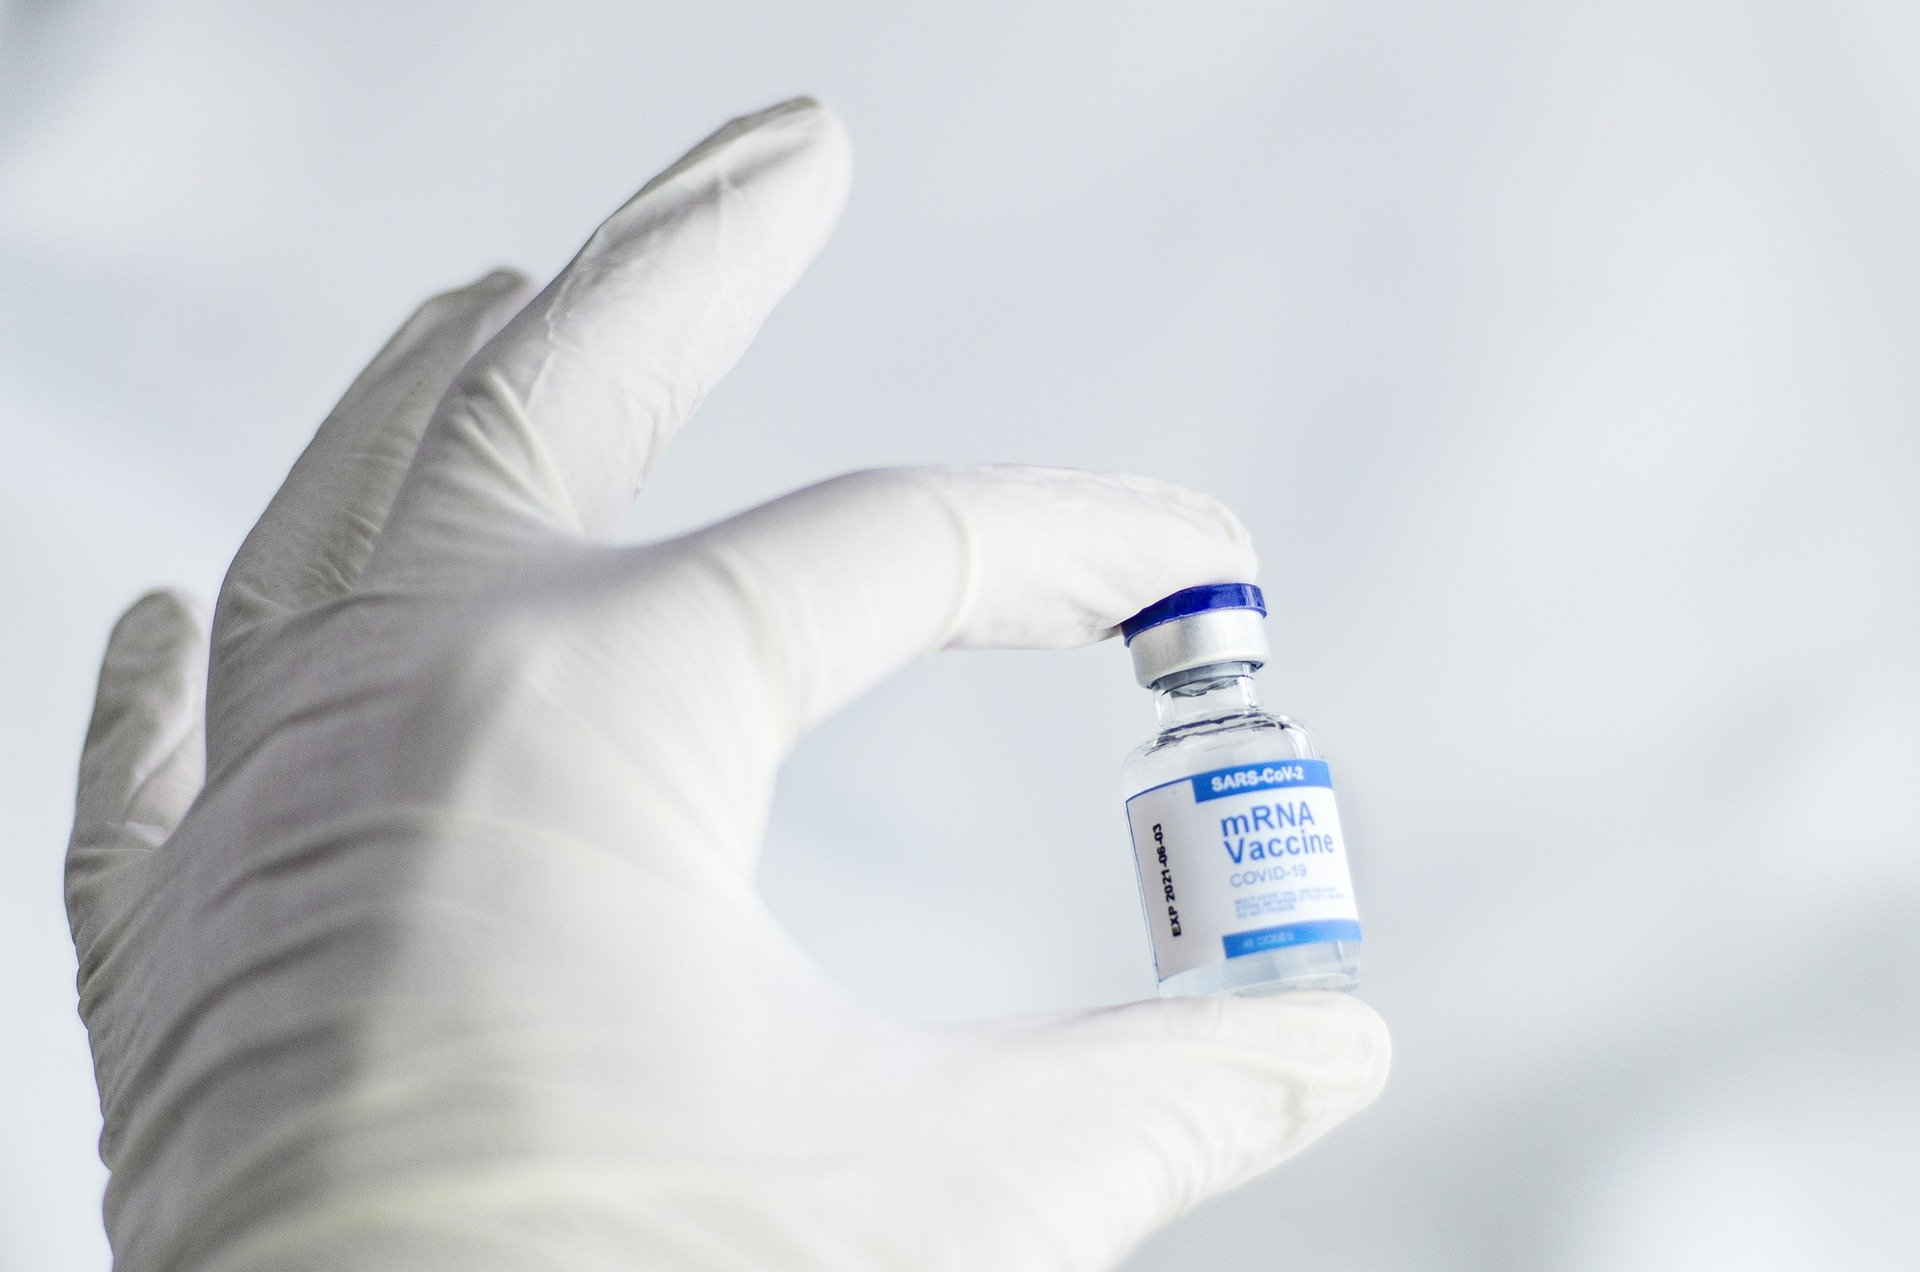

## Introduction 

The ongoing COVID-19 pandemic has posed an unparalleled public health threat to countries around the world, resulting in a significant loss of human lives.  Its economic and social consequences have been also been devastating. 

Immunisation against COVID-19 plays an important role in minimising the transmission risk and prevents countries from facing strained healthcare system. Countries hence strive to achieve a high level of COVID-19 vaccination rate to provide protection for the majority of their population.

With that in mind, the World Health Organization (WHO) continues to strive to support every country to vaccinate at least 40% of its population by the end of year 2021 and 70% by the middle of year 2022. (Source: https://www.who.int/director-general/speeches/detail/who-director-general-s-opening-remarks-at-the-media-briefing-on-covid-19-30-july-2021)

## Problem Statement 
In this project, I aim to conduct a hypothesis testing to assess if we have achieved the WHO's vaccination target of 40% or more as at the end of September 2021. 

## Dataset
Mathieu, E., Ritchie, H., Ortiz-Ospina, E. et al. A global database of COVID-19 vaccinations. Nat Hum Behav (2021)

(Source: https://ourworldindata.org/covid-vaccinations )

## Executive Summary

[A. Set Up](#set_up)

[B. Assumptions](#assumptions)

[C. Data Sampling](#sampling)

[D. Hypotheses](#hypo)

[E. Test Statistics](#teststat)

[F. Decision Rule](#decisionrule)

[G. Calculation of Test Statistics and P-value](#calc)

[H. Conclusion](#con)

## A. Set Up <a id = "set_up"></a> 

### i. Import python packages

In [1]:
from scipy.stats import normaltest
import scipy.stats as stats
from scipy.stats import boxcox
from scipy.stats import yeojohnson
from scipy.stats import skew
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from fitter import Fitter, get_common_distributions, get_distributions
from statsmodels.stats.contingency_tables import cochrans_q
from scipy.stats import anderson
import scikit_posthocs as sp

# install fitter
# conda install -c bioconda fitter

# install posthocs
# conda install -c conda-forge scikit-posthocs

### ii. Dataset loading

In [2]:
# load dataset
df = pd.read_csv('dataset/owid-covid-data.csv')

# view head
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


### iii. Data Wrangling to obtain interested rows and columns

> #### Display column names

In [3]:
# display columns
print(df.columns)

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

> #### Slicing to obtain required columns

In [4]:
# get interested columns
df = df[['continent','location','date','people_fully_vaccinated','population',
         'people_vaccinated_per_hundred','people_fully_vaccinated_per_hundred']]

> #### Filter to get required rows

In [5]:
# filter to only get rows that are dated 30/9/21
df = df.loc[df['date']=='2021-09-30']

# drop rows where continent is "NaN"
df = df[df['continent'].notnull()]

# drop rows where people_fully_vaccinated_per_hundred is "NaN"
df = df[df['people_fully_vaccinated_per_hundred'].notnull()]

# reset index
df = df.reset_index(drop=True)

# view head
df.head()

,continent,location,date,people_fully_vaccinated,population,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred
0,Europe,Albania,2021-09-30,794878.0,2872934.0,32.95,27.67
1,South America,Argentina,2021-09-30,22088966.0,45605823.0,65.07,48.43
2,North America,Aruba,2021-09-30,74805.0,107195.0,75.91,69.78
3,Oceania,Australia,2021-09-30,11386339.0,25788217.0,64.78,44.15
4,Europe,Austria,2021-09-30,5418864.0,9043072.0,63.44,59.92


In [6]:
# get shape
print(df.shape)

(107, 7)


### iv. Outlier handling on Vaccination Rate

> #### Box Plot on Vaccination Rate

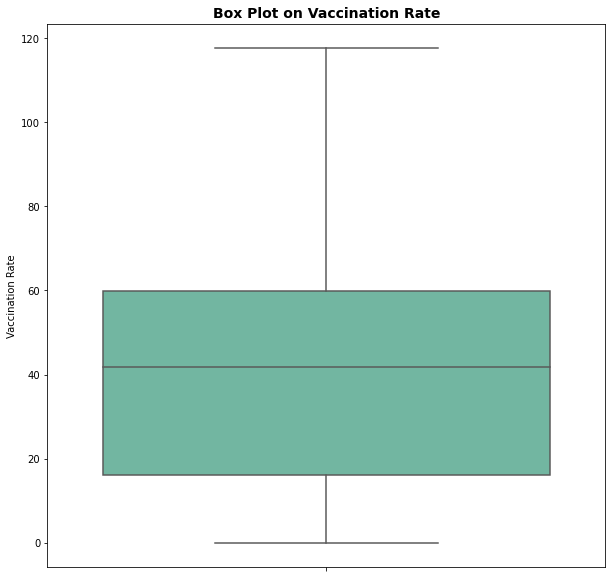

In [7]:
# boxplot on Vaccination Rate

# set the figure size for the plot
plt.figure(figsize=(10,10)) 

# Seaborn - box plot
sns.boxplot(data=df, y='people_fully_vaccinated_per_hundred', palette="Set2")

# x-axis, y-axis and title adjustment and labelling
plt.title('Box Plot on Vaccination Rate',fontweight="bold",fontsize=14)
plt.ylabel('Vaccination Rate')

# show the graph
plt.show()

- From the box plot, it appears that there are data points above 100%, which is unlikely to be true. We shall explore further using descriptive statistics.

> #### Descriptive Statistics on Vaccination Rate

In [8]:
# get descriptive statistics
df['people_fully_vaccinated_per_hundred'].describe()

count    107.000000
mean      39.286355
std       25.139982
min        0.040000
25%       16.045000
50%       41.890000
75%       59.990000
max      117.580000
Name: people_fully_vaccinated_per_hundred, dtype: float64

In [9]:
# check which records has people_fully_vaccinated_per_hundred > 100
print(df[df['people_fully_vaccinated_per_hundred']>100])

   continent   location        date  people_fully_vaccinated  population  \
36    Europe  Gibraltar  2021-09-30                  39613.0     33691.0   

    people_vaccinated_per_hundred  people_fully_vaccinated_per_hundred  
36                         118.58                               117.58  


- It appears that there are rows where the people_fully_vaccinated_per_hundred is above 100%. This is strange as the people vaccinated is greater than the country's population. 
- For the purpose of this project, I'll drop the rows where the people_fully_vaccinated_per_hundred is above 100% since it is immaterial (only 1 row). 

> #### Removal of outlier

In [10]:
# drop the row where the people_fully_vaccinated_per_hundred > 100
df=df[df['people_fully_vaccinated_per_hundred']<100]

In [11]:
# get the shape to ensure that only 1 row is dropped
print(df.shape)

(106, 7)


### v. Descriptive statistics on Vaccination Rate

In [12]:
# get the revised descriptive statistics
print(df['people_fully_vaccinated_per_hundred'].describe())

count    106.000000
mean      38.547736
std       24.064647
min        0.040000
25%       15.547500
50%       41.565000
75%       59.920000
max       82.560000
Name: people_fully_vaccinated_per_hundred, dtype: float64


## B. Assumptions <a id = "assumptions"></a> 

### i. Normality test on population

/Users/jasonkhoo/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


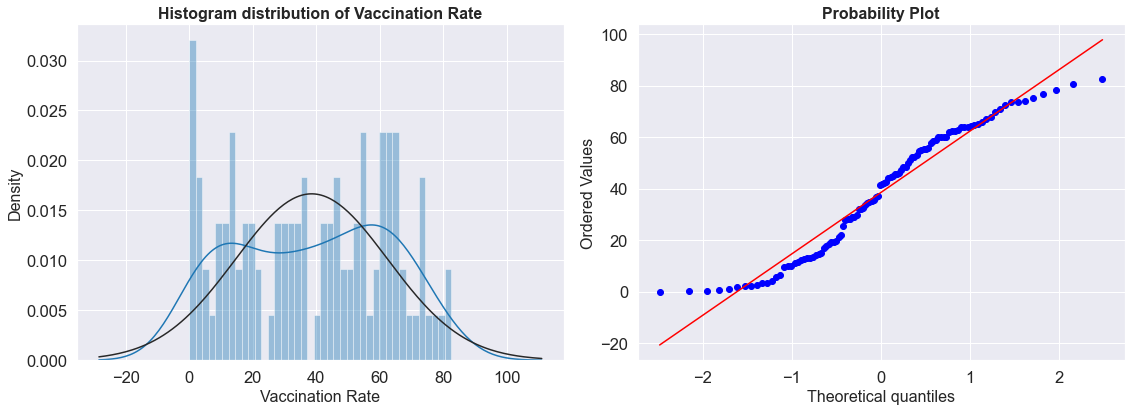

In [13]:
# visualisation on normality
plt.figure(figsize=(16,6))
sns.set_style("darkgrid")
sns.set_context("notebook", font_scale=1.5, rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16}) 

plt.subplot(1,2,1)
sns.distplot(df['people_fully_vaccinated_per_hundred'],bins=40,fit=stats.norm,kde=True)
plt.title('Histogram distribution of Vaccination Rate',fontweight="bold")
plt.xlabel('Vaccination Rate')

plt.subplot(1,2,2)
stats.probplot(df['people_fully_vaccinated_per_hundred'],dist='norm',plot=plt)
plt.title('Probability Plot',fontweight="bold")

plt.tight_layout()
plt.show()

> #### **H0: Distribution is normal**
> #### **H1: Distribution is not normal**

In [14]:
# D'Agostino's K2 test (D'Agostino 1990) Normality Test
stat, p = normaltest(df['people_fully_vaccinated_per_hundred'])

print('stat=%.2f, p=%.2f' % (stat, p))
if p > 0.05:
    print('Approximately Normally Distributed')
else:
    print('Not Approximately Normally Distributed')

stat=47.14, p=0.00
Not Approximately Normally Distributed


Since the **p-value (0.00) < significance level (0.05)**, we **reject H0** and conclude that the distribution is not normal at 5% significance level.

In [15]:
# Anderson-Darling Normality Test
result = anderson(df['people_fully_vaccinated_per_hundred'])

print('stat=%.2f' % (result.statistic))
for i in range(len(result.critical_values)):
    significance_level, critical_Value = result.significance_level[i], result.critical_values[i]
    if result.statistic < critical_Value:
        print('Approximately Normally Distributed at %.2f%% level' % (significance_level))
    else:
        print('Not Approximately Normally Distributed %.2f%% level' % (significance_level))

stat=1.63
Not Approximately Normally Distributed 15.00% level
Not Approximately Normally Distributed 10.00% level
Not Approximately Normally Distributed 5.00% level
Not Approximately Normally Distributed 2.50% level
Not Approximately Normally Distributed 1.00% level


By applying the Anderson-Darling Normality Test, the distribution has been concluded that it is not normal.

### ii. Data transformation

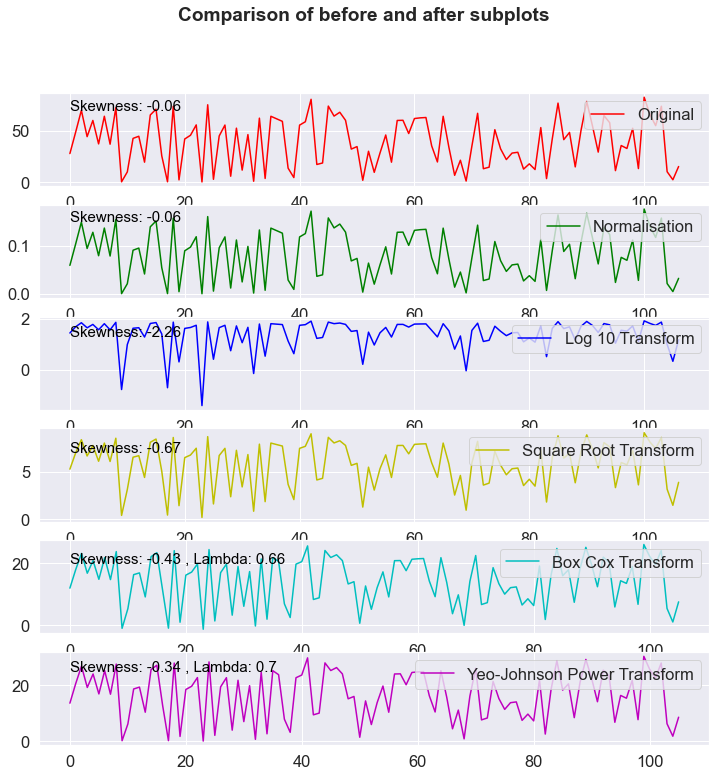

In [16]:
# Before transformation
before_transform = df['people_fully_vaccinated_per_hundred']
before_skew = np.round(before_transform.skew(),2)

# Normalisation
normalised = (before_transform) / np.linalg.norm((before_transform),axis=0)
skew_normalised = np.round(normalised.skew(),2)

# Log10
log10_transform = np.log10(before_transform)
skew_log10 = np.round(log10_transform.skew(),2)

# Square root
sqrtx_transform = np.sqrt(before_transform)
skew_sqrtx = np.round(sqrtx_transform.skew(),2)

# Box Cox
box_cox, best_Lambda_maxlog = boxcox(before_transform)
skew_boxcox = np.round(skew(box_cox),2)

# Yeo-Johnson - able to do on negative values
yeo_John, Lambda_Yeo_John = yeojohnson(before_transform)
skew_after_yeoJohn = np.round(skew(yeo_John),2)

# Plot visualisation
fig, axs = plt.subplots(6,1,figsize=(12,12))
fig.suptitle('Comparison of before and after subplots',fontweight="bold")
style = dict(size=15, color='black')

axs[0].plot(before_transform, color='r',label="Original")
axs[0].text(0, 70, "Skewness: " + str(before_skew), **style)
axs[0].legend(loc="upper right")

axs[1].plot(normalised, color='g', label="Normalisation")
axs[1].text(0, 0.15, "Skewness: " + str(skew_normalised), **style)
axs[1].legend(loc="upper right")

axs[2].plot(log10_transform, color='b', label="Log 10 Transform")
axs[2].text(0, 1.3, "Skewness: " + str(skew_log10), **style)
axs[2].legend(loc="upper right")

axs[3].plot(sqrtx_transform, color='y', label="Square Root Transform")
axs[3].text(0, 7, "Skewness: " + str(skew_sqrtx), **style)
axs[3].legend(loc="upper right")

axs[4].plot(box_cox, color='c', label="Box Cox Transform")
axs[4].text(0, 20, "Skewness: " + str(skew_boxcox)+ " , Lambda: " + str((np.round(best_Lambda_maxlog,2))) , **style)
axs[4].legend(loc="upper right")

axs[5].plot(yeo_John, color='m', label="Yeo-Johnson Power Transform")
axs[5].text(0, 25, "Skewness: " + str(skew_after_yeoJohn) + " , Lambda: " + str((np.round(Lambda_Yeo_John,2))) , **style)
axs[5].legend(loc="upper right")

plt.show()

- Based on the transformation results, it appears that only normalisation works well. The remaining data transformation techniques achieved a poorer skew as compared to the skew before transformation.
- For normalisation, the skew achieved does not have any difference from the skew before transformation. 

### iii. Alternative Distribution Fitting

,sumsquare_error,aic,bic,kl_div
beta,0.012534,899.767564,-939.877004,inf
burr,0.012684,902.356275,-938.619255,inf
norm,0.015385,923.221633,-927.483475,inf
gamma,0.015396,925.241821,-922.741043,inf
invgamma,0.015568,926.300314,-921.566180,inf


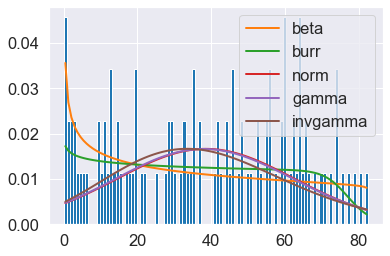

In [17]:
# attempt to fit the data into different kind of distributions

height = df['people_fully_vaccinated_per_hundred'].values

f = Fitter(height,
           distributions=['gamma',
                          'invgamma',
                          "beta",
                          "burr",
                          "norm"])
f.fit()
f.summary()

In [18]:
# get the best fit (lowest sumsquare_error -> best fit)
f.get_best(method = 'sumsquare_error')

{'beta': (0.7446364292013611,
  1.0260819610877159,
  0.039999999999999994,
  82.59306637324245)}

Based on the above fitting, it appears that beta and burr is a better fit as compared to the normal fit since they result in a lower sumsquare_error. 

### iv. Conclusion
- The parent population is not normal based on the normality test.
- Based on the alternative distribution fitting, beta seemed to be the better fit for the distribution as compared to normal.
- It appears that non-parametric testing should be considered in view that the distribution is not normal. 

## C. Data Sampling <a id = "sampling"></a> 

### i. Recode of values for non-parametric testing

> #### If vaccination status is 40 and above, it would be recoded as 1 (Success).
> #### If vaccination status is below, it would be recoded as 0 (Failure).

In [19]:
# if vaccination status of 40 and above: 1, if not then: 0
df['recode_people_fully_vaccinated_per_hundred'] = df['people_fully_vaccinated_per_hundred'].apply(
    lambda x: 1 if x >= 40 else 0)
df=df[['continent','location','recode_people_fully_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred']]
df

,continent,location,recode_people_fully_vaccinated_per_hundred,people_fully_vaccinated_per_hundred
0,Europe,Albania,0,27.67
1,South America,Argentina,1,48.43
2,North America,Aruba,1,69.78
3,Oceania,Australia,1,44.15
4,Europe,Austria,1,59.92
...,...,...,...,...
102,North America,United States,1,54.89
103,South America,Uruguay,1,73.75
104,Asia,Vietnam,0,10.00
105,Africa,Zambia,0,2.16


### ii. Streamline data within the population (i.e. continent)

In [20]:
# combine North America and South America as Americas
df['continent'] = df['continent'].apply(lambda x: 'Americas' if x in ['North America', 
                                                                      'South America'] else x)
df

,continent,location,recode_people_fully_vaccinated_per_hundred,people_fully_vaccinated_per_hundred
0,Europe,Albania,0,27.67
1,Americas,Argentina,1,48.43
2,Americas,Aruba,1,69.78
3,Oceania,Australia,1,44.15
4,Europe,Austria,1,59.92
...,...,...,...,...
102,Americas,United States,1,54.89
103,Americas,Uruguay,1,73.75
104,Asia,Vietnam,0,10.00
105,Africa,Zambia,0,2.16


In [21]:
# count by continent to ensure that sample is relatively random
df[['location','continent']].groupby('continent').agg(count=pd.NamedAgg(column='continent',
                                                                        aggfunc='count'))

,count
continent,
Africa,22
Americas,20
Asia,30
Europe,33
Oceania,1


### iii. Drop off 'Oceania' continent from the population in view that there is only 1 records in that continent and a sampling achieved from 1 records may not be meaningful

In [22]:
# returns rows on the condition that the continent is not 'Oceania'
df=df.loc[df['continent']!='Oceania']
df[['location','continent']].groupby('continent').agg(count=pd.NamedAgg(column='continent',
                                                                        aggfunc='count'))

,count
continent,
Africa,22
Americas,20
Asia,30
Europe,33


### iv. Get sample via random sampling

In [23]:
df_europe=df.loc[df['continent']=='Europe']
df_africa=df.loc[df['continent']=='Africa']
df_asia=df.loc[df['continent']=='Asia']
df_americas=df.loc[df['continent']=='Americas']

# random sampling of n=20 from each continents
df_sample_europe = df_europe.sample(n=20,random_state=42)
df_sample_africa = df_africa.sample(n=20,random_state=42)
df_sample_asia = df_asia.sample(n=20,random_state=42)
df_sample_americas = df_americas.sample(n=20,random_state=42)

In [24]:
# create a sample dataframe to include all the values in desired shape
df_sample = df_sample_europe[['recode_people_fully_vaccinated_per_hundred']]
df_sample = df_sample.rename(columns={'recode_people_fully_vaccinated_per_hundred': 'Europe'})
df_sample = df_sample.reset_index(drop=True)

# convert all the values in the remaining continent to list
africa_values=df_sample_africa['recode_people_fully_vaccinated_per_hundred'].values.tolist()
asia_values=df_sample_asia['recode_people_fully_vaccinated_per_hundred'].values.tolist()
americas_values=df_sample_americas['recode_people_fully_vaccinated_per_hundred'].values.tolist()

# put the list back to the sample dataframe
df_sample['Africa'] = africa_values
df_sample['Asia'] = asia_values
df_sample['Americas'] = americas_values

df_sample

,Europe,Africa,Asia,Americas
0,0,0,1,1
1,0,1,1,0
2,1,0,1,0
3,1,0,1,1
4,1,0,1,1
5,1,0,0,1
6,0,0,1,0
7,0,0,1,1
8,1,0,0,1
9,0,0,0,0


### v. Descriptive Statistics on Samples

In [25]:
# get the descriptive statistics
print("Europe: ")
print(df_sample_europe['recode_people_fully_vaccinated_per_hundred'].describe())
print("Africa: ")
print(df_sample_africa['recode_people_fully_vaccinated_per_hundred'].describe())
print("Asia: ")
print(df_sample_asia['recode_people_fully_vaccinated_per_hundred'].describe())
print("Americas: ")
print(df_sample_americas['recode_people_fully_vaccinated_per_hundred'].describe())

Europe: 
count    20.00000
mean      0.65000
std       0.48936
min       0.00000
25%       0.00000
50%       1.00000
75%       1.00000
max       1.00000
Name: recode_people_fully_vaccinated_per_hundred, dtype: float64
Africa: 
count    20.000000
mean      0.050000
std       0.223607
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: recode_people_fully_vaccinated_per_hundred, dtype: float64
Asia: 
count    20.000000
mean      0.700000
std       0.470162
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: recode_people_fully_vaccinated_per_hundred, dtype: float64
Americas: 
count    20.000000
mean      0.600000
std       0.502625
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: recode_people_fully_vaccinated_per_hundred, dtype: float64


### vi. Homogeneity of Variances on Samples

> #### **Levene's test (Levene 1960) on homogeneity of variances**
> #### **H0: Variances are equal** 
> #### **H1: Variances are not equal**

In [26]:
(test_statistic, p_value) = stats.levene(df_sample_europe['recode_people_fully_vaccinated_per_hundred'],
                                         df_sample_africa['recode_people_fully_vaccinated_per_hundred'],
                                         df_sample_asia['recode_people_fully_vaccinated_per_hundred'],
                                        df_sample_americas['recode_people_fully_vaccinated_per_hundred']) 
print("The test statistic is: ", round(test_statistic,5))
print("The p-value is: ", round(p_value,5))

The test statistic is:  2.53333
The p-value is:  0.06319


Since the **p-value (0.06319) > significance level (0.05)**, we **do not reject H0** and conclude that the sample variances are equal (i.e. homogeneous).

## D. Hypotheses <a id = "hypo"></a> 

**Null Hypothesis (H0):** The mean worldwide vaccination rate for each continents is same (i.e. people fully vaccinated per hundred in all continents >= 40&).

**Alternative Hypothesis (H1):** The mean worldwide vaccination for each continents is not same (i.e. not all people fully vaccinated per hundred in all continents >= 40 )

& >= 40 was chosen in view that according on the samples' descriptive statistics, 3/4 samples has median of 1 (success, vacciantion rate of >=40).

## E. Test Statistics <a id = "teststat"></a>  
A Cochran's Q test (non-parametric) shall be used given that the following characteristics: 
- Population data does not follow a normal distribution.
- Hypotheses is based on whether there are differences on dichotomous dependent variable i.e. 1 or 0 between three or more related groups.

## F. Decision Rule <a id = "decisionrule"></a>  
- Significance level set at the standard 0.05 (5%).
- H0 will be rejected if p-value < significance level.

## G. Calculation of Test Statistics and P-value <a id = "calc"></a>  

\begin{align}
  & {{H}_{0}}:\,\,s _{1}\,=\,\,s _{2}\,=\,\,s _{3}=\,s _{4}  \\
 & {{H}_{1}}:\,\,s _{1}\,\ne \,\,s _{2}\,\ne \,\,s _{3}\,\ne \,\,s _{4} \\ 
\end{align}

In [27]:
# conversion of df_sample into array for testing
df_array = np.array(df_sample)
df_array  

array([[0, 0, 1, 1],
       [0, 1, 1, 0],
       [1, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 0, 1, 1],
       [1, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 0, 1, 1],
       [1, 0, 0, 1],
       [0, 0, 0, 0],
       [1, 0, 1, 0],
       [1, 0, 1, 0],
       [1, 0, 0, 1],
       [1, 0, 0, 1],
       [1, 0, 0, 1],
       [0, 0, 1, 1],
       [1, 0, 1, 1],
       [1, 0, 1, 0],
       [1, 0, 1, 0],
       [0, 0, 1, 1]])

In [28]:
# cochrans_q test
q_stat, pvalue, dof = cochrans_q(df_array,return_object=False)   

print("The test statistics is", q_stat)
print("The p-value is", pvalue)
print("The degrees of freedom", dof)

The test statistics is 18.333333333333332
The p-value is 0.0003754281889906412
The degrees of freedom 3


## H. Conclusion  <a id = "con"></a> 

### Statistical Conclusion
Since the **p-value (0.0003754) < significance level (0.05)**, we **reject H0** and conclude that there is statistical difference between the results on the achievement of the 40% vaccination rate target between countries in different continents. 

### Business Conclusion
Based on the results from the hypthesis testing, not all countries have vaccination rate 40% or above. WHO would have not achieved their worldwide 40% target as at the end of September 2021. 

Greater concerted efforts on pushing for greater vaccination rates across all countries, especially those within the Africa continent, would have to be done to achieve WHO's 40% by the end of 2021.

### Limitations
One should keep in mind that Cochran's Q test assessed only whether the vaccination rate results (i.e. whether >= 40% or <40%) is the same for countries in the major 4 continents identified. It did not indicate which continent's results within the 4 groups are statistically different from each other. 

Nonetheless, the descriptive statistics from the sample can provide us with great guidance. From the median, it indicates that countries in the Europe, Asia and Americas continent have met the 40% target vaccination rate since all their medians have value of 1. Countries in the Africa continents seem like they require more support in their vaccination efforts. From the mean, it seems that the vaccination status are currently ranked as follows: Asia > Europe > Americas > Africa. However, one should be cautious about relying solely on the descriptive statistics since it is derived based on the sample chosen and may not be representative of the worldwide vaccination rates. 

### Future Research
The use of Post-Hoc test could determine which continent has the best vaccination rates and also the significant paired differences between the 4 major continents. 

### Post-Hoc Analysis

> #### Dunn Test

In [29]:
#Unpivot from wide to long format
long_df = pd.melt(df_sample, var_name='continent', value_name='success')

#view long format
long_df

,continent,success
0,Europe,0
1,Europe,0
2,Europe,1
3,Europe,1
4,Europe,1
...,...,...
75,Americas,1
76,Americas,1
77,Americas,0
78,Americas,0


In [30]:
#dunn post-hoc 
sp.posthoc_dunn(long_df,val_col='success',group_col='continent',p_adjust='bonferroni')

,Africa,Americas,Asia,Europe
Africa,1.000000,0.003281,0.000264,0.000976
Americas,0.003281,1.000000,1.000000,1.000000
Asia,0.000264,1.000000,1.000000,1.000000
Europe,0.000976,1.000000,1.000000,1.000000


Based on the above results, we are able to tell that only Africa has significant difference in successes with Americas, Asia and Europe (p-value less than 0.05). This was in line with the expectations from the descriptive statistics which shows that Africa's median is 0 while the medians for Americas, Asia and Europe are 1. 

It appears that there's no significant differences between Americas, Asia and Europe.

> #### Box plot display

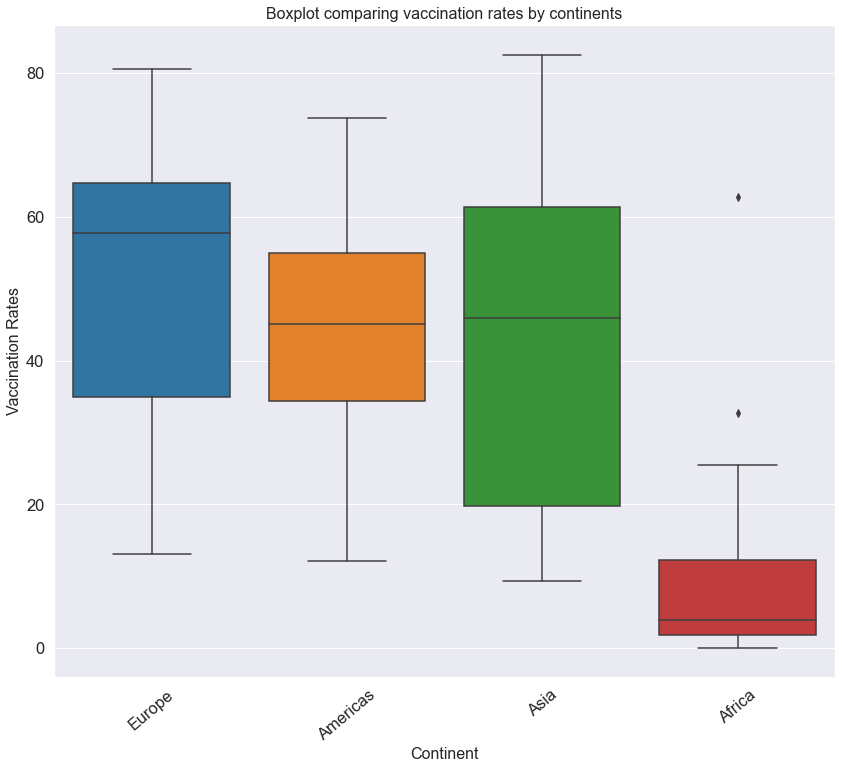

In [31]:
plt.figure(figsize=(14,12))
sns.boxplot(data=df,y='people_fully_vaccinated_per_hundred',x='continent')
plt.xlabel('Continent')
plt.ylabel('Vaccination Rates')
plt.title('Boxplot comparing vaccination rates by continents')
plt.xticks(rotation=40)
plt.show()

Based on the above visualisation, there is (1) no overlap between Africa and the other 3 continents and (2) box plots of Europe, Americas and Asia overlap each other. This is in line with the Dunn Test which states that (1)  vaccination rates in Africa has statistical differences between itself and the other 3 continents and (2) no statistical differences between Europe, Americas and Asia. 

## Credits

Cover Image Attribution: Pixabay (www.pixabay.com)